# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [8]:
%run ../test/test_algorithms.py

........
----------------------------------------------------------------------
Ran 8 tests in 0.091s

OK


In [9]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.037s

OK


In [10]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [11]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## Running example of the system

In [ ]:
%run ../tools/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [14]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [15]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [12]:
%run ../tools/predictorsI.py

In [16]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [17]:
op0.create_bilstm()

In [18]:
op0.model_blueprint()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 27, 100)           20800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 51,510
Trainable params: 51,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
op0.fit_model(10)

Epoch 1/10
20/20 [==============================] - 1s 43ms/step - loss: 20.6314 - mean_squared_error: 20.6314 - val_loss: 22.3057 - val_mean_squared_error: 22.3057
Epoch 2/10
20/20 [==============================] - 0s 18ms/step - loss: 5.1889 - mean_squared_error: 5.1889 - val_loss: 7.7301 - val_mean_squared_error: 7.7301
Epoch 3/10
20/20 [==============================] - 0s 17ms/step - loss: 0.4640 - mean_squared_error: 0.4640 - val_loss: 0.6654 - val_mean_squared_error: 0.6654
Epoch 4/10
20/20 [==============================] - 0s 18ms/step - loss: 0.1395 - mean_squared_error: 0.1395 - val_loss: 0.4396 - val_mean_squared_error: 0.4396
Epoch 5/10
20/20 [==============================] - 0s 17ms/step - loss: 0.1024 - mean_squared_error: 0.1024 - val_loss: 0.3156 - val_mean_squared_error: 0.3156
Epoch 6/10
20/20 [==============================] - 0s 20ms/step - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.1921 - val_mean_squared_error: 0.1921
Epoch 7/10
20/20 [============

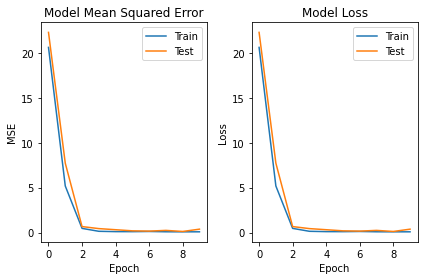

In [20]:
op0.show_performance()

In [22]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [23]:
nice = op0.predict(oyea)
nice

array([[7.8092895, 7.4960346, 8.100695 , 7.5970926, 7.5433383, 7.7114053,
        7.8961105, 8.394489 , 8.937011 , 8.202603 ]], dtype=float32)

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(300,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [152]:
%run ../tools/predictorsIII.py

In [153]:
len(prices)

279

In [164]:
op4 = HybridUnivariatePredictor(prices,10, 24, 7)

ValueError: Steps going into the past need to be evenly divisible by sub sequence

In [165]:
op4.create_cnnlstm()

In [166]:
op4.fit_model(10)

Epoch 1/10
20/20 [==============================] - 0s 17ms/step - loss: 21.2581 - mean_squared_error: 21.2581 - val_loss: 13.2238 - val_mean_squared_error: 13.2238
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 2.2011 - mean_squared_error: 2.2011 - val_loss: 1.3377 - val_mean_squared_error: 1.3377
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.3282 - mean_squared_error: 0.3282 - val_loss: 0.5906 - val_mean_squared_error: 0.5906
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1264 - mean_squared_error: 0.1264 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.1332 - val_mean_squared_error: 0.1332
Epoch 7/10
20/20 [=================

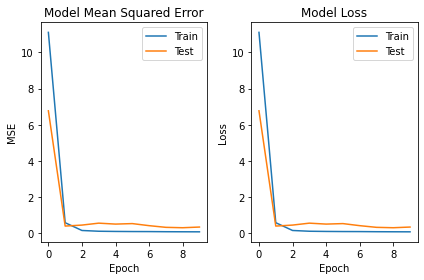

In [145]:
op4.show_performance()

In [146]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [147]:
nice = op4.predict(oyea)
nice

array([[7.7184496, 7.63477  , 7.8734136, 7.7907596, 7.8487754, 7.816095 ,
        8.0207   ]], dtype=float32)